<a href="https://colab.research.google.com/github/Akanksha-Nakati/Amazon-Electronic-Products-Sales-Analysis/blob/main/Amazon_Electronic_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Datasets

The dataset gives electronics sales data at Amazon.

It contains user ratings for various electronics items sold, along with category of each item and time of sell.

The dataset is available at https://www.kaggle.com/datasets/edusanketdk/electronics

In [66]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization

import seaborn as sns

# Importing the dataset

dataset = pd.read_csv('/content/electronics.csv')



## Data Exploration

In [67]:
# list of first five rows

dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [101]:
# list of last five rows

dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
1292874,9125,1157555,3.0,2018-09-05,Female,Headphones,EldHus,2018,Female,0,9
1292876,9217,1157557,5.0,2018-09-05,Male,Headphones,nan,2018,Female,0,9
1292909,9205,1157590,5.0,2018-09-14,Male,Headphones,nan,2018,Female,0,9
1292941,9263,1157621,5.0,2018-09-24,Male,Camera & Photo,nan,2018,Female,0,9
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2018,Female,0,10


In [69]:
# shape

dataset.shape

(1292954, 10)

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


We can see that the dataset contains 10 columns and 1292954 rows.

The columns and data types are as follows:

Item ID - int64

User ID - int64

Rating - float64

Timestamp - object

Model Attribute - object

Category - object

Brand - object

Year - int64

User Attribute - object

Split - int64

## Data Cleaning

In [71]:
#converting the column timestamp to datetime
from datetime import datetime

pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

We can also see that the column Product ID is of object data type, but it is actually a string.

In [72]:
#Converting it to a string

dataset['brand'] = dataset['brand'].astype(str)

We can also see that the column Category is of object data type, but it is actually a string.

In [73]:
#Converting it to a string

dataset['category'] = dataset['category'].astype(str)

We can also see that the column Timestamp is of int64 data type, but it is actually a timestamp.

In [74]:
#Converting it to a string

dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

We can also see that the column Rating is of int64 data type, but it is actually a float.

In [75]:
#Converting it to a string

dataset['rating'] = dataset['rating'].astype(float)

We can also see that the column User ID is of int64 data type, but it is actually a string.

In [76]:
#Converting it to a string

dataset['user_id'] = dataset['user_id'].astype(str)

We can also see that the column Product ID is of object data type, but it is actually a string.

In [77]:
#Converting it to a string

dataset['item_id'] = dataset['item_id'].astype(str)

In [78]:
dataset.describe()

,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01
std,1.379732e+00,2.643513e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


In [79]:
# We can also see the number of unique users and items in the dataset.

dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [80]:
# checking for duplicates

dataset.duplicated().sum()

0

In [81]:
# checking for missing values

dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
dtype: int64

In [82]:
# the distribution of ratings

dataset['rating'].value_counts()

5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: rating, dtype: int64

In [83]:
# what was the best year of sales

dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset['year'].value_counts()

2015    320887
2016    302619
2017    192477
2014    180676
2013     99855
2018     80229
2012     38389
2011     23894
2010     16888
2009     12804
2008      9428
2007      6798
2006      2614
2005      2170
2004      1275
2003       833
2002       481
2001       403
2000       187
1999        47
Name: year, dtype: int64

2015 was the best year of sales

In [84]:
# what was the best month of sales

dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset['month'].value_counts()

1     140773
12    124597
3     116464
2     110546
8     109835
7     107612
4      99136
5      98207
9      97368
11     97015
6      96317
10     95084
Name: month, dtype: int64

January was the best month of sales

In [85]:
# drop all null values

dataset.dropna(inplace=True)

# check for missing values

dataset.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

## Data Visualization

Which ratings has most chosen?

<Axes: xlabel='rating', ylabel='count'>

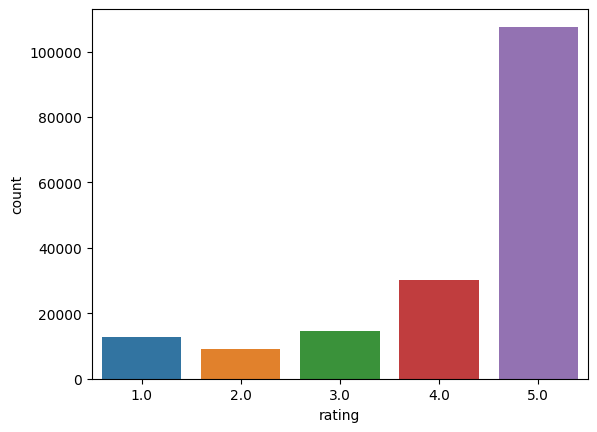

In [86]:
# the distribution of ratings

sns.countplot(x='rating', data=dataset)

In [87]:
# the distribution of ratings
dataset['rating'].value_counts()

5.0    107593
4.0     30104
3.0     14593
1.0     12652
2.0      9182
Name: rating, dtype: int64

The distribution of ratings is as follows:
most of the ratings are 5

What was the best year of sales?

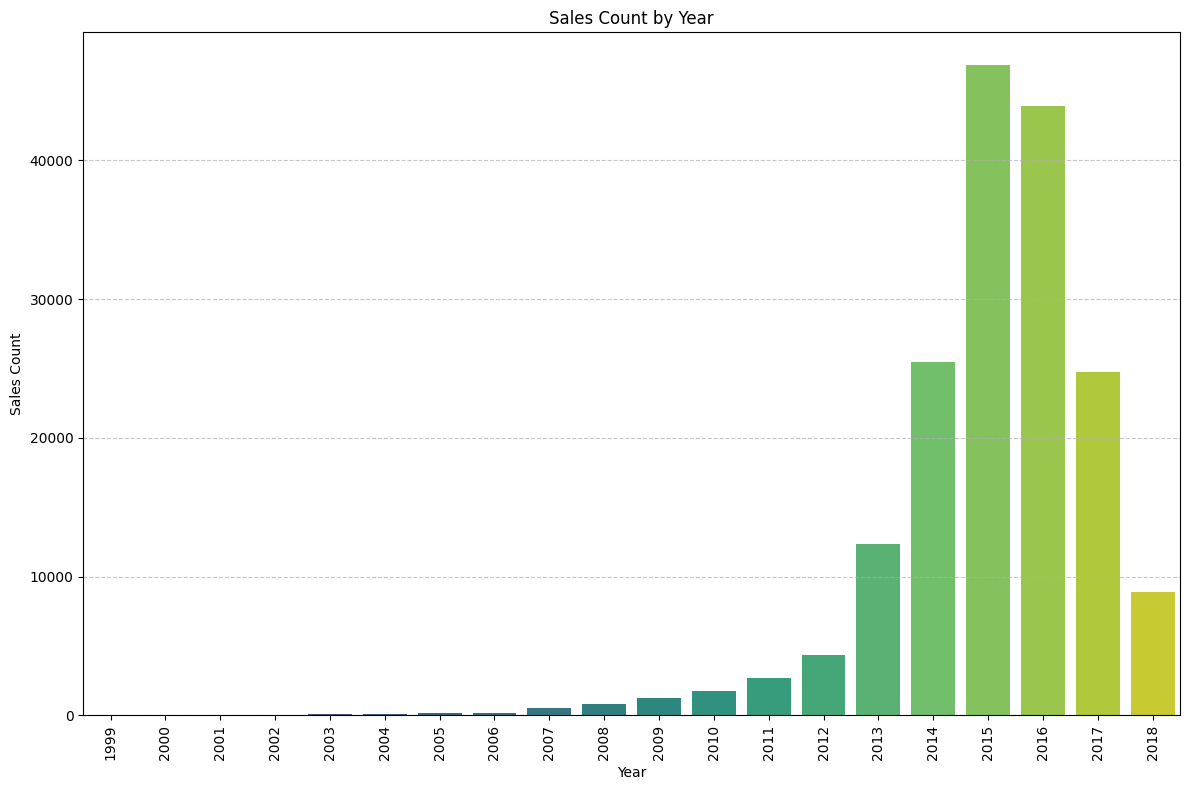

In [88]:
# the distribution of sales by year
# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='year', data=dataset, palette='viridis')

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.title('Sales Count by Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot with a tight layout
plt.tight_layout()
plt.show()



2015 was the best year of sales

What are the brands with the most sales?

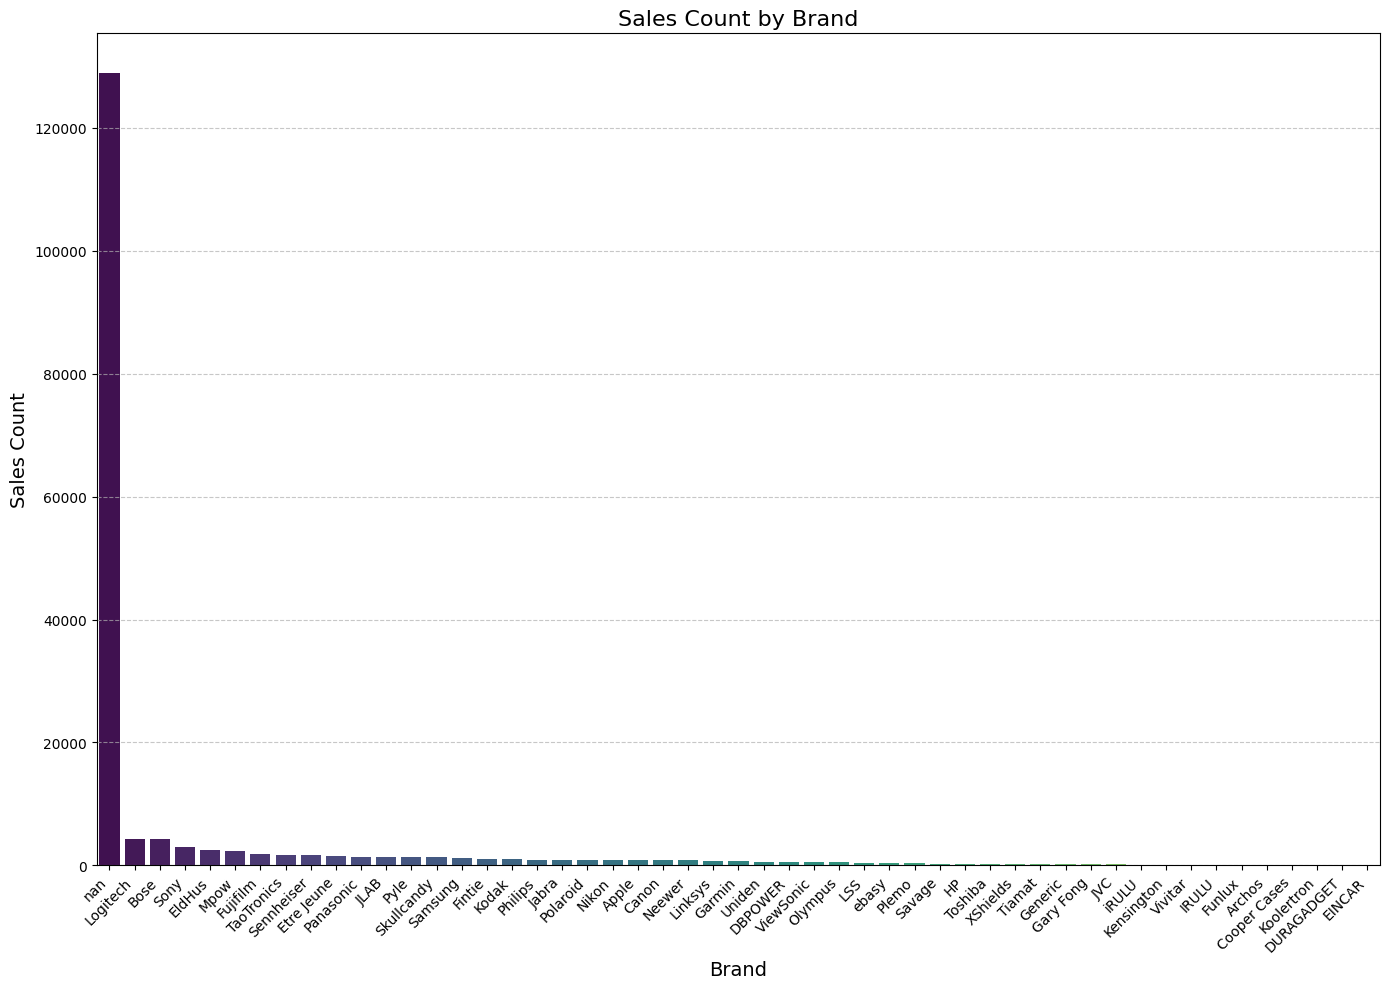

In [100]:
# Increasing the figure size for better readability
plt.figure(figsize=(14, 10))

# Plotting the countplot with ordered brand data
ax = sns.countplot(
    x='brand',
    data=dataset,
    order=dataset['brand'].value_counts().index,
    palette='viridis'
)

# Rotating the x-axis labels to prevent overlap and improve readability
plt.xticks(rotation=45, ha='right')

# Adding descriptive axis labels and a title
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Sales Count', fontsize=14)
plt.title('Sales Count by Brand', fontsize=16)

# Adding gridlines for better visibility of count values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensuring everything fits well within the plot
plt.tight_layout()

# Displaying the plot
plt.show()



What brand name sold the least?

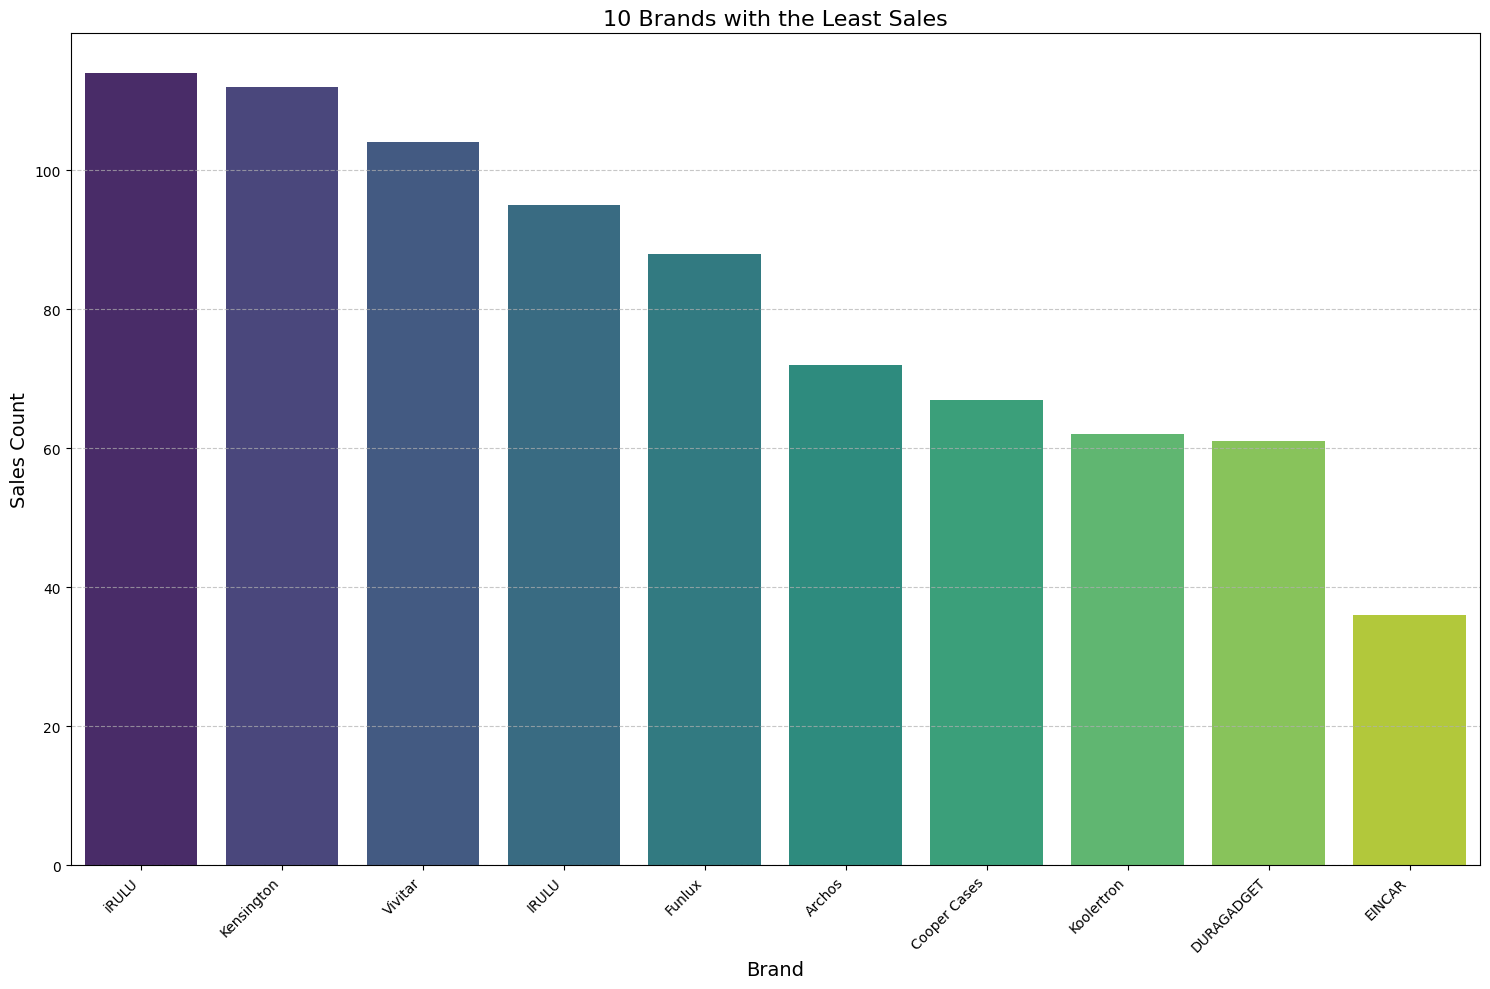

In [90]:
# Increasing the figure size for better readability
plt.figure(figsize=(15, 10))

# Plotting the countplot with ordered brand data for the least sold brands
ax = sns.countplot(
    x='brand',
    data=dataset,
    order=dataset['brand'].value_counts().iloc[-10:].index,
    palette='viridis'
)

# Rotating the x-axis labels to prevent overlap and improve readability
plt.xticks(rotation=45, ha='right')

# Adding descriptive axis labels and a title
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Sales Count', fontsize=14)
plt.title('10 Brands with the Least Sales', fontsize=16)

# Adding gridlines for better visibility of count values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensuring everything fits well within the plot
plt.tight_layout()

# Displaying the plot
plt.show()



In [91]:
# Perform the data analysis for 2016 brand sales
# We will start by filtering the dataset for the year 2016 and then perform analysis.
dataset_2016 = dataset[dataset['year'] == 2016]

# Now, we'll analyze the sales for each brand in 2016.
sales_counts_2016 = dataset_2016['brand'].value_counts()


What are the brands with the most sales in 2016

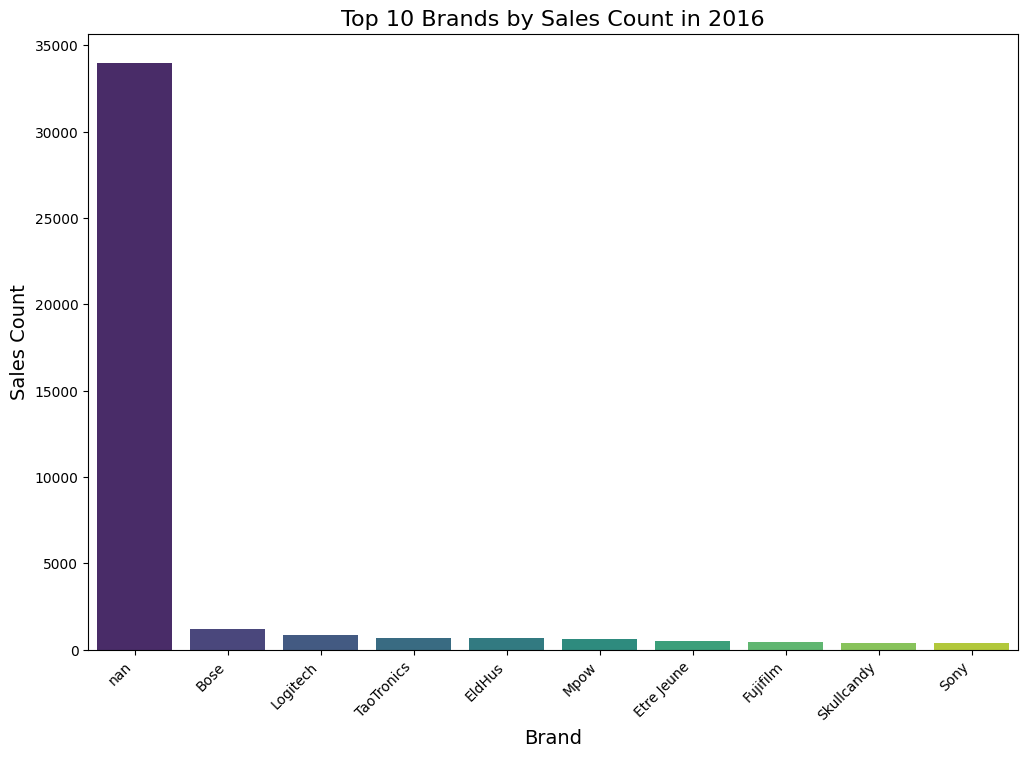

In [92]:
# We will now plot the bar chart for the top 10 brands with the most sales in 2016.

# Filtering the top 10 brands
top10_brands_2016 = dataset_2016['brand'].value_counts().head(10)

# Plotting the bar chart for the top 10 brands
plt.figure(figsize=(12, 8))
sns.barplot(x=top10_brands_2016.index, y=top10_brands_2016.values, palette='viridis')

# Adding the plot title and labels
plt.title('Top 10 Brands by Sales Count in 2016', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Sales Count', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


What are the brands with the most sales in 2017

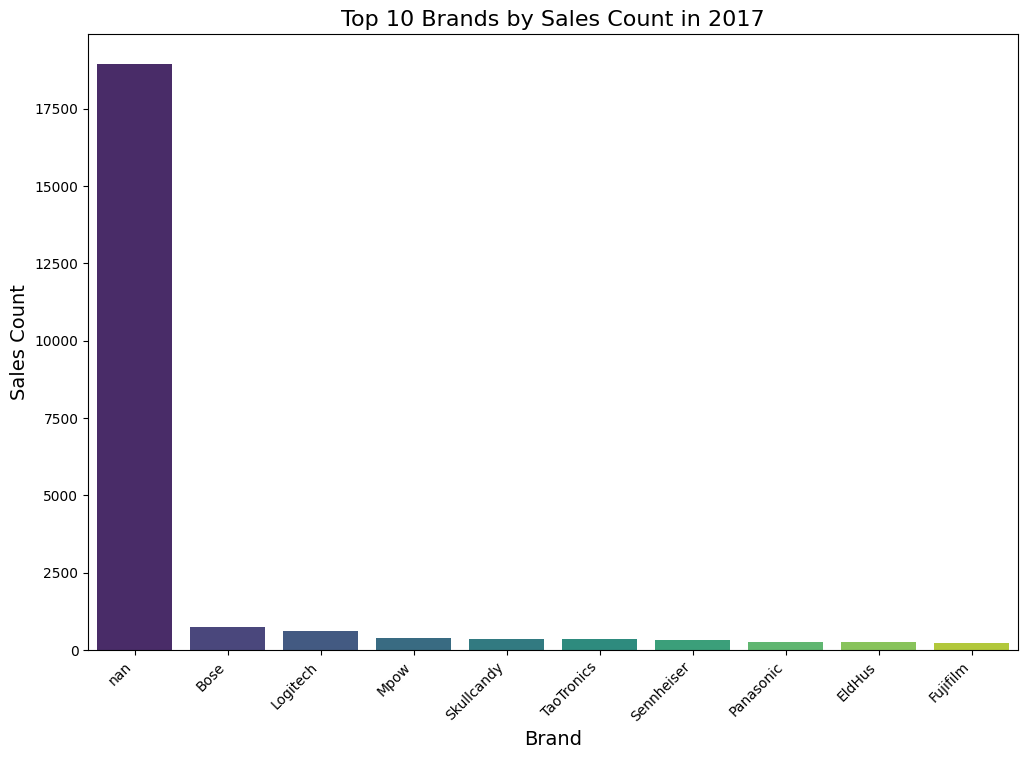

In [93]:
# Filter the dataset for the year 2017 for analysis
dataset_2017 = dataset[dataset['year'] == 2017]

# Get the top 10 brands with the most sales in 2017
top10_brands_2017 = dataset_2017['brand'].value_counts().head(10)

# Plotting the bar chart for the top 10 brands in 2017
plt.figure(figsize=(12, 8))
sns.barplot(x=top10_brands_2017.index, y=top10_brands_2017.values, palette='viridis')

# Adding the plot title and labels
plt.title('Top 10 Brands by Sales Count in 2017', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Sales Count', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()



What are the brands with the most sales in 2018

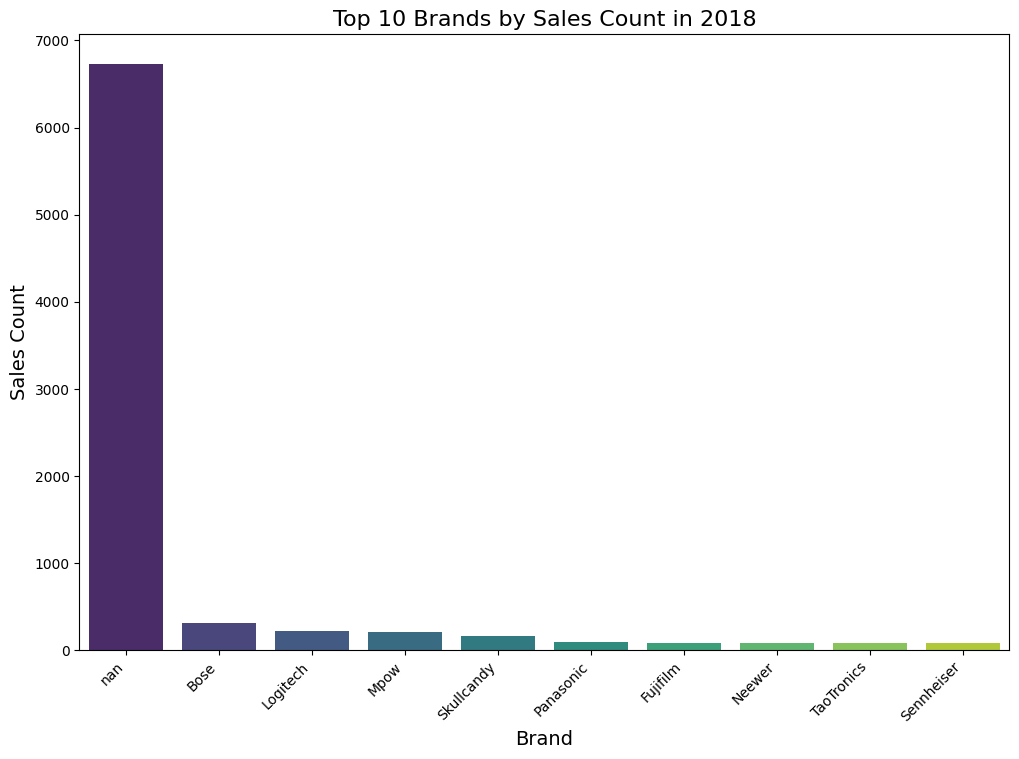

In [94]:
# Filter the dataset for the year 2018 for analysis
dataset_2018 = dataset[dataset['year'] == 2018]

# Get the top 10 brands with the most sales in 2018
top10_brands_2018 = dataset_2018['brand'].value_counts().head(10)

# Plotting the bar chart for the top 10 brands in 2018
plt.figure(figsize=(12, 8))
sns.barplot(x=top10_brands_2018.index, y=top10_brands_2018.values, palette='viridis')

# Adding the plot title and labels
plt.title('Top 10 Brands by Sales Count in 2018', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Sales Count', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


Months with most sales

<Axes: xlabel='month', ylabel='count'>

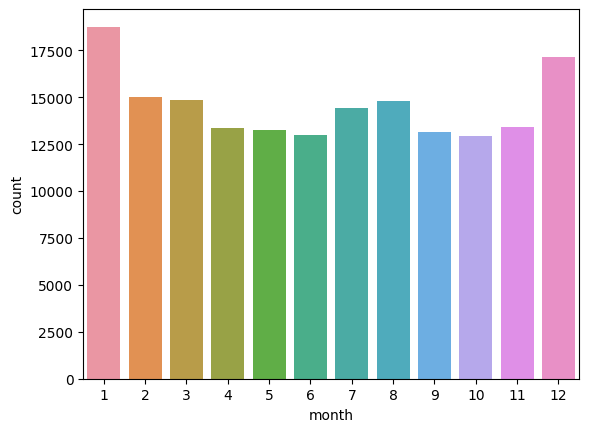

In [95]:
sns.countplot(x='month', data=dataset)

What products by category were sold the most in January?

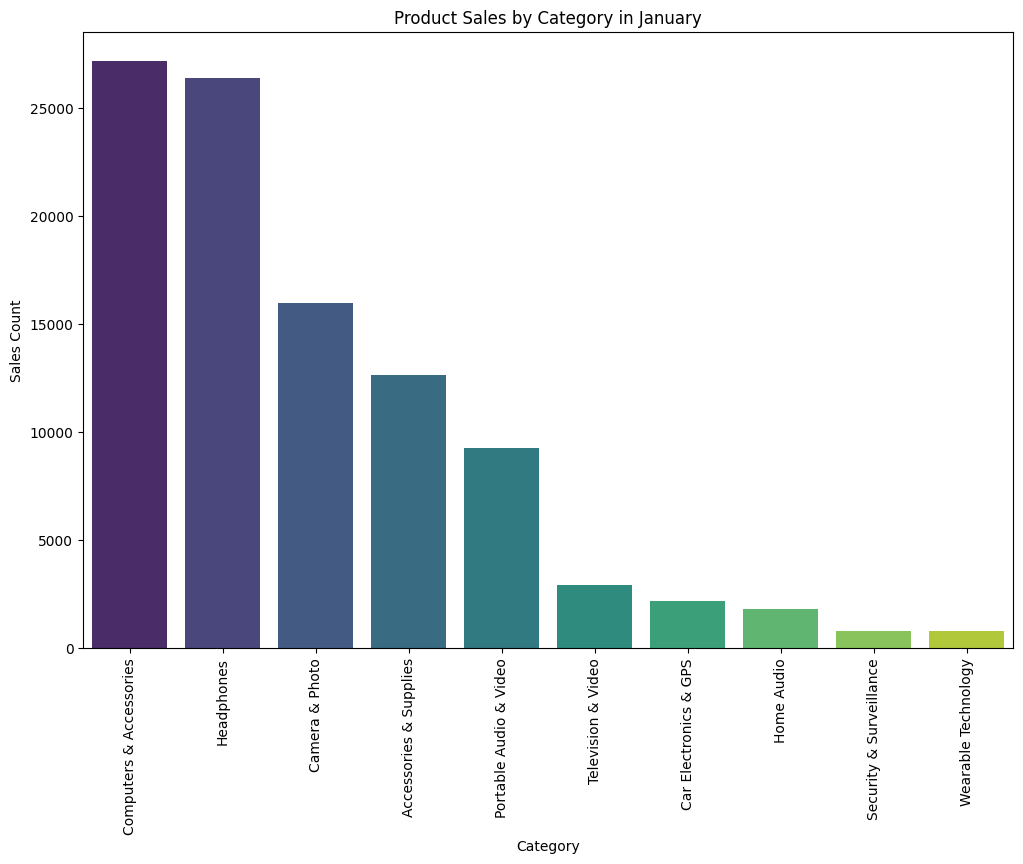

In [96]:
# Now, let's analyze the sales for each product category in January.
january_category_sales = dataset_january['category'].value_counts()

# Plotting the bar chart for product categories sold in January
plt.figure(figsize=(12, 8))
sns.barplot(x=january_category_sales.index, y=january_category_sales.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Product Sales by Category in January')
plt.xlabel('Category')
plt.ylabel('Sales Count')
plt.show()



What are the Categories with the least sales?

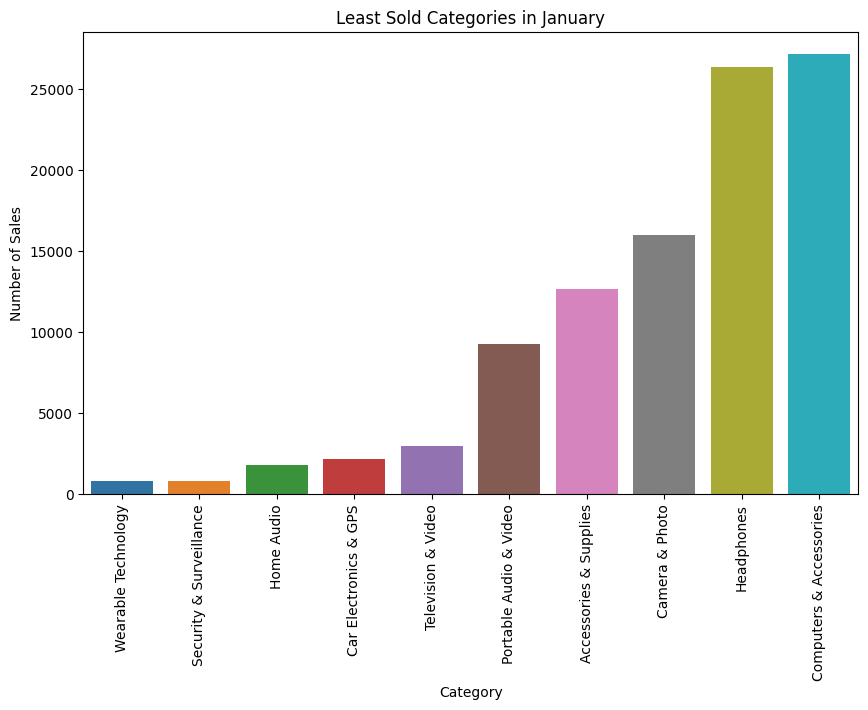

In [97]:
# Get the least sold categories in January
least_sold_categories = dataset_january['category'].value_counts().nsmallest(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=least_sold_categories.index, y=least_sold_categories.values)
plt.xticks(rotation=90)
plt.title('Least Sold Categories in January')
plt.ylabel('Number of Sales')
plt.xlabel('Category')
plt.show()


What are the Sales Distribution by Category in the month of January?

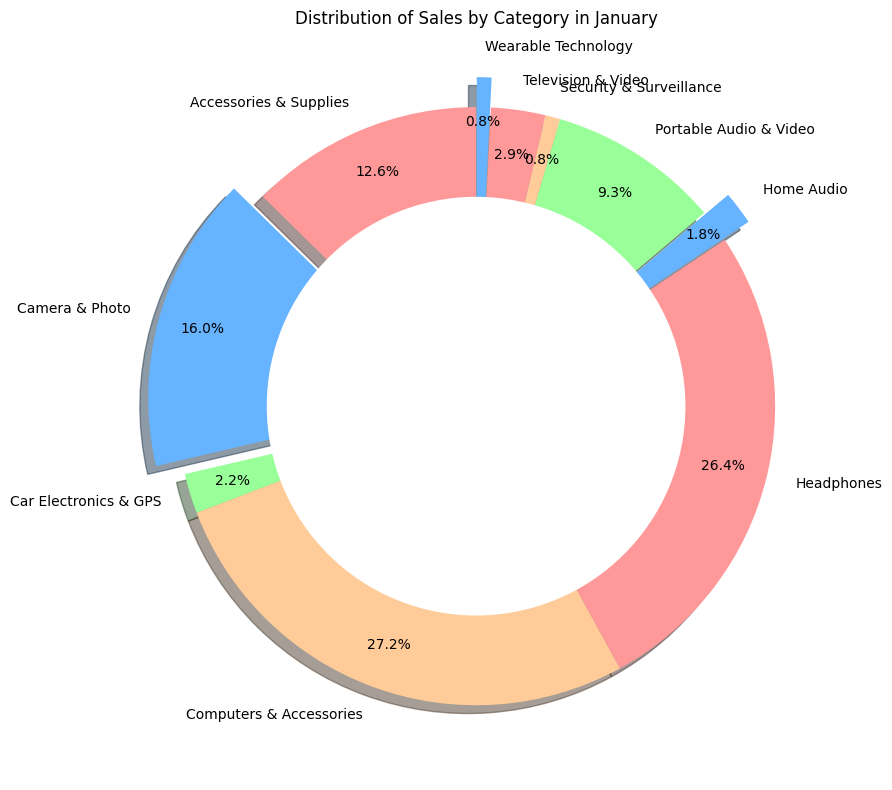

In [98]:
import matplotlib.pyplot as plt

# Assuming 'sales_by_category' is a Series with your category sales data
sales_by_category.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    explode=(0, 0.1, 0, 0, 0, 0.1, 0, 0, 0, 0.1),  # Explode out the top 3 slices
    pctdistance=0.85,  # Adjust the distance of the percentage labels
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],  # Example color palette
    figsize=(10, 8)
)
plt.title('Distribution of Sales by Category in January')
# Draw a circle at the center to turn the pie into a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()
